# Data visualisation and exploration

In [65]:
import pandas as pd
import numpy as np

import os
import sys

# librosa is a Python library for analyzing audio and music. It can be used to extract the data from the audio files we will see it later.
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.sequence import pad_sequences

# to play the audio files
from IPython.display import Audio

import warnings

2022-03-12 14:31:37.581223: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-12 14:31:37.581327: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [66]:
CREMA = '../raw_data/wav_files/'
dir_list = os.listdir(CREMA)
dir_list.sort()
print(dir_list[0:10])

['1001_DFA_ANG_XX.wav', '1001_DFA_DIS_XX.wav', '1001_DFA_FEA_XX.wav', '1001_DFA_HAP_XX.wav', '1001_DFA_NEU_XX.wav', '1001_DFA_SAD_XX.wav', '1001_IEO_ANG_HI.wav', '1001_IEO_ANG_LO.wav', '1001_IEO_ANG_MD.wav', '1001_IEO_DIS_HI.wav']


In [67]:
gender = []
emotion = []
path = []
female = [1002,1003,1004,1006,1007,1008,1009,1010,1012,1013,1018,1020,1021,1024,1025,1028,1029,1030,1037,1043,1046,1047,1049,
          1052,1053,1054,1055,1056,1058,1060,1061,1063,1072,1073,1074,1075,1076,1078,1079,1082,1084,1089,1091]

for i in dir_list: 
    part = i.split('_')
    if int(part[0]) in female:
        temp = 'female'
    else:
        temp = 'male'
    gender.append(temp)
    
    if part[2] == 'SAD':
        emotion.append('sad')
    elif part[2] == 'ANG':
        emotion.append('angry')
    elif part[2] == 'DIS':
        emotion.append('disgust')
    elif part[2] == 'FEA':
        emotion.append('fear')
    elif part[2] == 'HAP':
        emotion.append('happy')
    elif part[2] == 'NEU':
        emotion.append('neutral')
    else:
        emotion.append('unknown')
    path.append(CREMA + i)
    
CREMA_df = pd.DataFrame(emotion, columns = ['emotion'])
#CREMA_df['source'] = 'CREMA'
CREMA_df = pd.concat([CREMA_df,pd.DataFrame(gender, columns = ['gender'])],axis=1)
CREMA_df = pd.concat([CREMA_df,pd.DataFrame(path, columns = ['path'])],axis=1)

In [68]:
def combo(df):
    return f'{df[1]}_{df[0]}'

def sad(x):
    return 1 if x.lower() == 'sad' else 0

def angry(x):
    return 1 if x.lower() == 'angry' else 0

def disgust(x):
    return 1 if x.lower() == 'disgust' else 0

def fear(x):
    return 1 if x.lower() == 'fear' else 0

def happy(x):
    return 1 if x.lower() == 'happy' else 0

def neutral(x):
    return 1 if x.lower() == 'neutral' else 0

In [69]:
CREMA_df['gender_emotion'] = CREMA_df.apply(combo,axis=1)
CREMA_df['sad'] = CREMA_df['emotion'].apply(sad)
CREMA_df['angry'] = CREMA_df['emotion'].apply(angry)
CREMA_df['disgust'] = CREMA_df['emotion'].apply(disgust)
CREMA_df['fear'] = CREMA_df['emotion'].apply(fear)
CREMA_df['happy'] = CREMA_df['emotion'].apply(happy)
CREMA_df['neutral'] = CREMA_df['emotion'].apply(neutral)

In [70]:
CREMA_df

,emotion,gender,path,gender_emotion,sad,angry,disgust,fear,happy,neutral
0,angry,male,../raw_data/wav_files/1001_DFA_ANG_XX.wav,male_angry,0,1,0,0,0,0
1,disgust,male,../raw_data/wav_files/1001_DFA_DIS_XX.wav,male_disgust,0,0,1,0,0,0
2,fear,male,../raw_data/wav_files/1001_DFA_FEA_XX.wav,male_fear,0,0,0,1,0,0
3,happy,male,../raw_data/wav_files/1001_DFA_HAP_XX.wav,male_happy,0,0,0,0,1,0
4,neutral,male,../raw_data/wav_files/1001_DFA_NEU_XX.wav,male_neutral,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
7437,disgust,female,../raw_data/wav_files/1091_WSI_DIS_XX.wav,female_disgust,0,0,1,0,0,0
7438,fear,female,../raw_data/wav_files/1091_WSI_FEA_XX.wav,female_fear,0,0,0,1,0,0
7439,happy,female,../raw_data/wav_files/1091_WSI_HAP_XX.wav,female_happy,0,0,0,0,1,0
7440,neutral,female,../raw_data/wav_files/1091_WSI_NEU_XX.wav,female_neutral,0,0,0,0,0,1


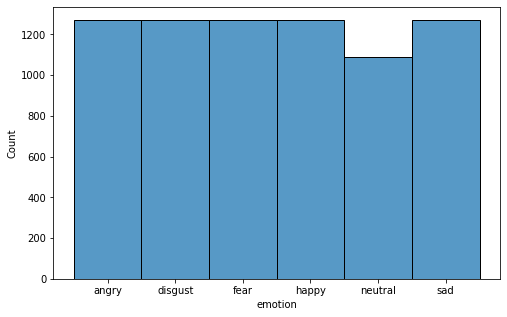

In [71]:
plt.figure(figsize=(8,5))
sns.histplot(CREMA_df.emotion);

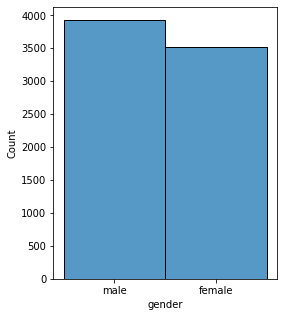

In [72]:
plt.figure(figsize=(4,5))
sns.histplot(CREMA_df.gender);

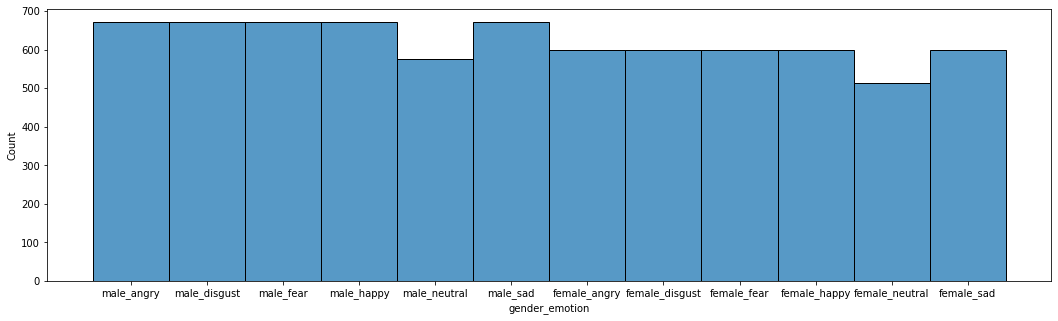

In [73]:
plt.figure(figsize=(18,5))
sns.histplot(CREMA_df.gender_emotion);

(55181,)


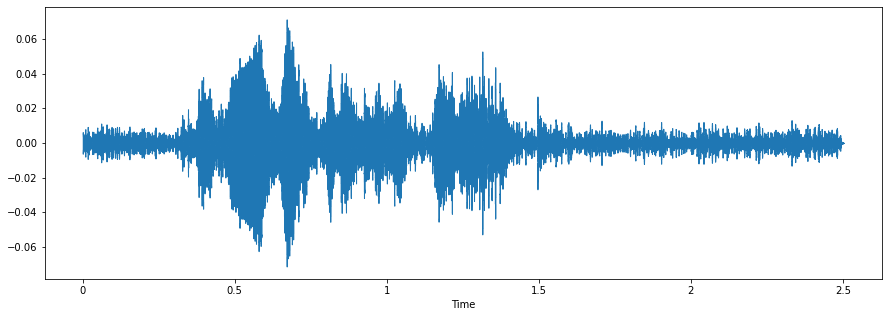

In [74]:
# use the well known Librosa library for this task 
fname = CREMA + '1091_IWW_SAD_XX.wav'  
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveshow(data, sr=sampling_rate)
print(data.shape)
# Lets play the audio 
Audio(fname)

In [75]:
data.shape

(55181,)

(5, 216)


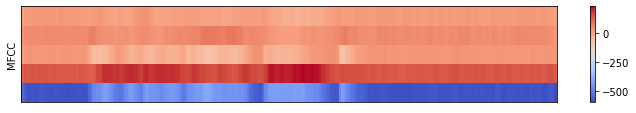

In [76]:
SAMPLE_RATE = 44100  
y, sr = librosa.load(fname, sr=SAMPLE_RATE, duration = 5) # Chop audio at 5 secs... 
mfcc = librosa.feature.mfcc(y=y, sr=SAMPLE_RATE, n_mfcc = 5) # 5 MFCC components
print(mfcc.shape)
plt.figure(figsize=(12, 6))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc)
plt.ylabel('MFCC')
plt.colorbar()

In [77]:
mfcc.shape

(5, 216)

In [78]:
mfcc_T = mfcc.T
mfcc_T.shape

(216, 5)

In [79]:
len(mfcc_T)

216

In [80]:
mfcc_T[150:,:].shape

(66, 5)

In [81]:
mfcc_list = []
while len(mfcc_T) > 150:
    mfcc_chunk = mfcc_T[:150,:]
    mfcc_list.append(mfcc_chunk)
    mfcc_T = mfcc_T[150:,:]
mfcc_list.append(mfcc_T)

In [82]:
mfcc_list[0].shape

(150, 5)

In [83]:
mfcc_list[1].shape

(66, 5)

In [87]:
mfcc_list_pad = []
for i in mfcc_list:
    mfcc = i.T
    mfcc_pad = pad_sequences(mfcc,
                             maxlen=615,
                             dtype='float32',
                             padding='post',
                             value=-1000.)
    mfcc_pad_T = mfcc_pad.T
    print(mfcc_pad_T.shape)
    mfcc_pad_T_reshape = mfcc_pad_T.reshape(1,615, 5)
    mfcc_list_pad.append(mfcc_pad_T_reshape)
    

(615, 5)
(615, 5)


In [91]:
mfcc_list_pad

[array([[[ -539.7988  ,   129.99919 ,    13.655821,    33.34374 ,
              8.37018 ],
         [ -560.61835 ,   146.03186 ,    22.5354  ,    48.473793,
             19.856436],
         [ -579.0948  ,   140.8168  ,    30.85453 ,    51.10874 ,
             22.886082],
         ...,
         [-1000.      , -1000.      , -1000.      , -1000.      ,
          -1000.      ],
         [-1000.      , -1000.      , -1000.      , -1000.      ,
          -1000.      ],
         [-1000.      , -1000.      , -1000.      , -1000.      ,
          -1000.      ]]], dtype=float32),
 array([[[ -585.6138  ,   134.9455  ,    33.62805 ,    59.9673  ,
             25.886753],
         [ -583.7611  ,   135.59467 ,    29.915455,    53.40656 ,
             21.468168],
         [ -585.4304  ,   133.94376 ,    29.251009,    50.093773,
             18.08388 ],
         ...,
         [-1000.      , -1000.      , -1000.      , -1000.      ,
          -1000.      ],
         [-1000.      , -1000.      , -1000.

In [ ]:
chunk_preds = []
    for chunk in chunks:
        chunk_pred = model_predict(chunk)
        chunk_preds.append(chunk_pred)
    array = np.array(chunk_preds)
    df = pd.DataFrame(array, columns=['Angry', 'Happy', 'Neutral', 'Sad'])

    plt.plot(
        'Angry',
        data=df,
        marker='o',
        markerfacecolor='blue',
        markersize=12,
        color='skyblue',
        linewidth=4,
        label="toto",
        linestyle='dashed',
    )

   plt.plot(
        'Happy',
        data=df,
        marker='o',
        markerfacecolor='blue',
        markersize=12,
        color='skyblue',
        linewidth=4,
        label="toto",
        linestyle='dashed',
    )

   plt.plot(
        'Neutral',
        data=df,
        marker='o',
        markerfacecolor='blue',
        markersize=12,
        color='skyblue',
        linewidth=4,
        label="toto",
        linestyle='dashed',
    )

   plt.plot(
        'Sad',
        data=df,
        marker='o',
        markerfacecolor='blue',
        markersize=12,
        color='skyblue',
        linewidth=4,
        label="toto",
        linestyle='dashed',
    )

    plt.legend()
    plt.show()


/tmp/ipykernel_29754/2998307289.py:2: FutureWarning: Pass y=[ 5.5271708e-03  6.3916706e-03  6.2614065e-03 ...  2.8221950e-07
 -6.6512985e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspec = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)


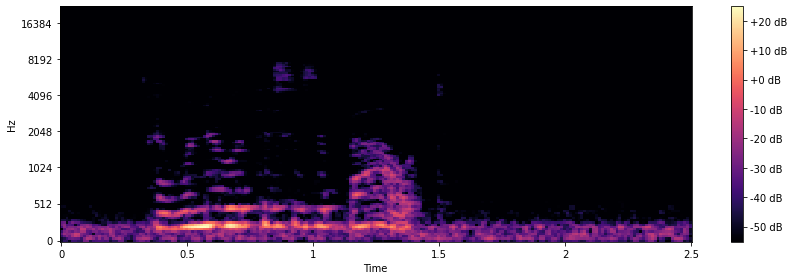

In [17]:
y, sr = librosa.load(fname, sr=SAMPLE_RATE, duration = 5) # Chop audio at 5 secs... 
melspec = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)

# Convert to log scale (dB). We'll use the peak power (max) as reference.
log_S = librosa.amplitude_to_db(melspec)

# Display the log mel spectrogram
plt.figure(figsize=(12,4))
librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+02.0f dB')
plt.tight_layout();

In [18]:
y, sr = librosa.load(fname, sr=SAMPLE_RATE, duration = 5) 
y_harmonic, y_percussive = librosa.effects.hpss(y)
Audio(y_harmonic, rate=sr)

In [19]:
Audio(y_percussive, rate=sr)

/tmp/ipykernel_29754/848197121.py:2: FutureWarning: Pass y=[ 3.1376195e-03  3.7753142e-03  3.9662300e-03 ... -5.1432016e-05
 -5.5611512e-05 -5.2544015e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspec = librosa.feature.melspectrogram(y_harmonic, sr=sr, n_mels=128)
/tmp/ipykernel_29754/848197121.py:6: FutureWarning: Pass y=[2.3895516e-03 2.6163564e-03 2.2951767e-03 ... 5.1714247e-05 4.8960221e-05
 5.2544019e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspec = librosa.feature.melspectrogram(y_percussive, sr=sr, n_mels=128)


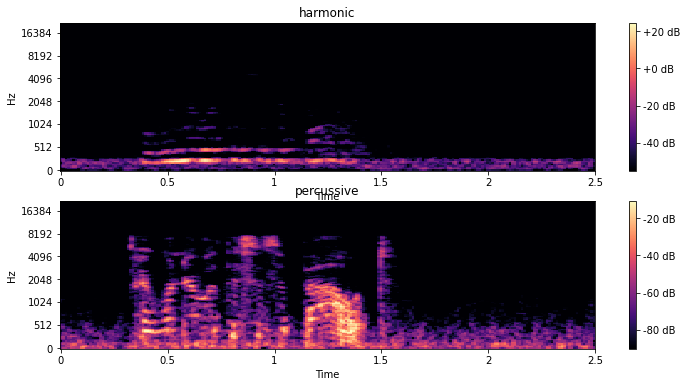

In [20]:
# harmonic 
melspec = librosa.feature.melspectrogram(y_harmonic, sr=sr, n_mels=128)
log_h = librosa.amplitude_to_db(melspec)

# percussive
melspec = librosa.feature.melspectrogram(y_percussive, sr=sr, n_mels=128)
log_p = librosa.amplitude_to_db(melspec)

# Display the log mel spectrogram of both harmonic and percussive
plt.figure(figsize=(12,6))

plt.subplot(2,1,1)
librosa.display.specshow(log_h, sr=sr, x_axis='time', y_axis='mel')
plt.title('harmonic')
plt.colorbar(format='%+02.0f dB')

plt.subplot(2,1,2)
librosa.display.specshow(log_p, sr=sr, x_axis='time', y_axis='mel')
plt.title('percussive')
plt.colorbar(format='%+02.0f dB')

/home/geowilso/.pyenv/versions/3.8.12/envs/speech-emotion-recognition/lib/python3.8/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=1024 is too small for input signal of length=863
  return f(*args, **kwargs)


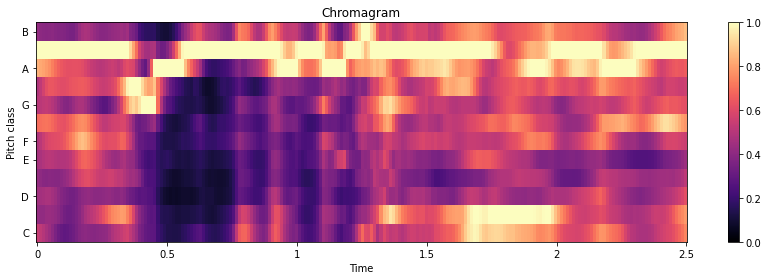

In [21]:
y, sr = librosa.load(fname, sr=SAMPLE_RATE, duration = 5)
C = librosa.feature.chroma_cqt(y=y, sr=sr)

# Make a new figure
plt.figure(figsize=(12,4))
# To make sure that the colors span the full range of chroma values, set vmin and vmax
librosa.display.specshow(C, sr=sr, x_axis='time', y_axis='chroma', vmin=0, vmax=1)
plt.title('Chromagram')
plt.colorbar()
plt.tight_layout()

# Creating sample data

In [17]:
#number of rows per gender/emotion combo
n = 100

In [18]:
group = CREMA_df.groupby('gender_emotion')
CREMA_sample = group.head(n)

In [19]:
CREMA_df.gender_emotion.value_counts()/len(CREMA_df)

male_angry        0.090164
male_disgust      0.090164
male_fear         0.090164
male_happy        0.090164
male_sad          0.090164
female_angry      0.080623
female_disgust    0.080623
female_fear       0.080623
female_happy      0.080623
female_sad        0.080623
male_neutral      0.077264
female_neutral    0.068799
Name: gender_emotion, dtype: float64

In [20]:
CREMA_sample.gender_emotion.value_counts()

male_angry        100
male_disgust      100
male_fear         100
male_happy        100
male_neutral      100
male_sad          100
female_angry      100
female_disgust    100
female_fear       100
female_happy      100
female_neutral    100
female_sad        100
Name: gender_emotion, dtype: int64

In [21]:
CREMA_sample.head()

,emotion,gender,path,gender_emotion,sad,angry,disgust,fear,happy,neutral
0,angry,male,../raw_data/wav_files/1001_DFA_ANG_XX.wav,male_angry,0,1,0,0,0,0
1,disgust,male,../raw_data/wav_files/1001_DFA_DIS_XX.wav,male_disgust,0,0,1,0,0,0
2,fear,male,../raw_data/wav_files/1001_DFA_FEA_XX.wav,male_fear,0,0,0,1,0,0
3,happy,male,../raw_data/wav_files/1001_DFA_HAP_XX.wav,male_happy,0,0,0,0,1,0
4,neutral,male,../raw_data/wav_files/1001_DFA_NEU_XX.wav,male_neutral,0,0,0,0,0,1


# Feature extraction for ML

feature_list = ['chroma_stft'
,'chroma_cqt'
,'chroma_cens'
,'melspectrogram'
,'mfcc'
,'spectral_centroid'
,'spectral_bandwidth'
,'spectral_contrast'
,'spectral_rolloff'
,'poly_features'
,'tonnetz'
,'tempogram'
,'fourier_tempogram']

librosa_list = [librosa.feature.chroma_stft
,librosa.feature.chroma_cqt
,librosa.feature.chroma_cens
,librosa.feature.melspectrogram
,librosa.feature.mfcc
,librosa.feature.spectral_centroid
,librosa.feature.spectral_bandwidth
,librosa.feature.spectral_contrast
,librosa.feature.spectral_rolloff
,librosa.feature.poly_features
,librosa.feature.tonnetz
,librosa.feature.tempogram
,librosa.feature.fourier_tempogram]

df_list = [
pd.DataFrame([[None,None]]*7442, columns=['chroma_stft_mean','chroma_stft_variance'])
,pd.DataFrame([[None,None]]*7442, columns=['chroma_cqt_mean','chroma_cqt_variance'])
,pd.DataFrame([[None,None]]*7442, columns=['chroma_cens_mean','chroma_cens_variance'])
,pd.DataFrame([[None,None]]*7442, columns=['melspectrogram_mean','melspectrogram_variance'])
,pd.DataFrame([[None,None]]*7442, columns=['mfcc_mean','mfcc_variance'])
,pd.DataFrame([[None,None]]*7442, columns=['spectral_centroid_mean','spectral_centroid_variance'])
,pd.DataFrame([[None,None]]*7442, columns=['spectral_bandwidth_mean','spectral_bandwidth_variance'])
,pd.DataFrame([[None,None]]*7442, columns=['spectral_contrast_mean','spectral_contrast_variance'])
,pd.DataFrame([[None,None]]*7442, columns=['spectral_rolloff_mean','spectral_rolloff_variance'])
,pd.DataFrame([[None,None]]*7442, columns=['poly_features_mean','poly_features_variance'])
,pd.DataFrame([[None,None]]*7442, columns=['tonnetz_mean','tonnetz_variance'])
,pd.DataFrame([[None,None]]*7442, columns=['tempogram_mean','tempogram_variance'])
,pd.DataFrame([[None,None]]*7442, columns=['fourier_tempogram_mean','fourier_tempogram_variance'])]

sample_rate = 44100

for i in range(len(feature_list)):
    counter=0
    for path in CREMA_df['path']:
        X, sample_rate = librosa.load(path
                                      , res_type='kaiser_fast'
                                      ,duration=2.5
                                      ,sr=sample_rate
                                      ,offset=0.5
                                     )
        sample_rate = np.array(sample_rate)
        
        features = np.mean(librosa_list[i](y=X, 
                                            sr=sample_rate),
                        axis=0)
        df_list[i][f'{feature_list[i]}_mean'][counter] = features.mean()
        df_list[i][f'{feature_list[i]}_variance'][counter] = features.var()
        counter=counter+1

rms_df = pd.DataFrame([[None,None]]*7442,columns=['rms_mean','rms_variance'])
sample_rate = 44100

counter=0
for path in CREMA_df['path']:
    X, sample_rate = librosa.load(path
                                  ,res_type='kaiser_fast'
                                  ,duration=2.5
                                  ,sr=sample_rate
                                  ,offset=0.5
                                 )
    sample_rate = np.array(sample_rate)
    
    features = np.mean(librosa.feature.rms(y=X),
                    axis=0)
    rms_df['rms_mean'][counter] = features.mean()
    rms_df['rms_variance'][counter] = features.var()
    
    counter=counter+1   

print(len(rms_df))
rms_df

spectral_flatness_df = pd.DataFrame([[None,None]]*7442,columns=['spectral_flatness_mean','spectral_flatness_variance'])
sample_rate = 44100
counter=0
for path in CREMA_df['path']:
    X, sample_rate = librosa.load(path
                                  ,res_type='kaiser_fast'
                                  ,duration=2.5
                                  ,sr=sample_rate
                                  ,offset=0.5
                                 )
    sample_rate = np.array(sample_rate)
    
    features = np.mean(librosa.feature.spectral_flatness(y=X),
                    axis=0)
    spectral_flatness_df['spectral_flatness_mean'][counter] = features.mean()
    spectral_flatness_df['spectral_flatness_variance'][counter] = features.var()
    
    counter=counter+1   

print(len(spectral_flatness_df))
spectral_flatness_df


zero_crossing_df = pd.DataFrame([[None,None]]*7442,columns=['zero_crossing_mean','zero_crossing_variance'])
sample_rate = 44100

counter=0
for path in CREMA_df['path']:
    X, sample_rate = librosa.load(path
                                  ,res_type='kaiser_fast'
                                  ,duration=2.5
                                  ,sr=sample_rate
                                  ,offset=0.5
                                 )
    sample_rate = np.array(sample_rate)

    features = np.mean(librosa.feature.zero_crossing_rate(y=X),
                    axis=0)
    zero_crossing_df['zero_crossing_mean'][counter] = features.mean()
    zero_crossing_df['zero_crossing_variance'][counter] = features.var()
    
    counter=counter+1   

print(len(zero_crossing_df))
zero_crossing_df

df_list.append([rms_df,spectral_flatness_df,zero_crossing_df])

final_df = df_list[0]
for df in df_list[1:]:
    final_df = final_df.join(df)
    

final_df = final_df.astype(float)

CREMA_df.to_csv('targets.csv')
final_df.to_csv('mean_variance.csv')

corr = final_df.corr()
plt.figure(figsize=(15,15))

sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap= "coolwarm")

# Machine learning for feature engineering

In [22]:
# Use this cell to regroup all your imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import set_config; set_config(display='diagram')

from sklearn.linear_model import LogisticRegression, LinearRegression, SGDClassifier, Ridge, RidgeClassifier, ElasticNet, Lasso
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_log_error, mean_squared_error
from sklearn.model_selection import cross_validate, cross_val_predict, train_test_split, cross_val_score,GridSearchCV, RandomizedSearchCV
from sklearn.metrics import precision_recall_curve, plot_confusion_matrix, classification_report, make_scorer
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler, OneHotEncoder, LabelEncoder, FunctionTransformer, OrdinalEncoder
from sklearn.pipeline import Pipeline, FeatureUnion, make_pipeline, make_union
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.compose import ColumnTransformer, make_column_transformer, make_column_selector
from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.tree import DecisionTreeClassifier,export_graphviz, DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier,BaggingClassifier,AdaBoostRegressor,AdaBoostClassifier,GradientBoostingRegressor,GradientBoostingClassifier,VotingClassifier,VotingRegressor,StackingClassifier,StackingRegressor
from sklearn.inspection import permutation_importance

from xgboost import XGBRegressor, XGBClassifier

/home/geowilso/.pyenv/versions/3.8.12/envs/speech-emotion-recognition/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [25]:
final_df = pd.read_csv('mean_variance.csv')

In [26]:
final_df.head()

,Unnamed: 0,chroma_stft_mean,chroma_stft_variance,chroma_cqt_mean,chroma_cqt_variance,chroma_cens_mean,chroma_cens_variance,melspectrogram_mean,melspectrogram_variance,mfcc_mean,...,tempogram_mean,tempogram_variance,fourier_tempogram_mean,fourier_tempogram_variance,rms_mean,rms_variance,spectral_flatness_mean,spectral_flatness_variance,zero_crossing_mean,zero_crossing_variance
0,0,0.460388,0.018822,0.576508,0.013585,0.268082,0.000261,0.642373,1.263033,-12.906330,...,0.152641,0.002000,0.337550,0.012151,0.039522,0.002035,0.000003,5.027523e-10,0.040323,0.000826
1,1,0.481672,0.017641,0.641137,0.010594,0.276158,0.000051,0.110351,0.049650,-13.545364,...,0.175920,0.004552,0.357927,0.013796,0.017827,0.000305,0.000008,5.327591e-09,0.038178,0.000844
2,2,0.465149,0.023859,0.555817,0.020826,0.266186,0.000229,1.351049,7.490268,-13.066236,...,0.118400,0.002095,0.331831,0.010436,0.053123,0.004774,0.000013,1.542845e-08,0.034576,0.000558
3,3,0.449076,0.016783,0.552369,0.011222,0.270920,0.000154,0.517502,1.091192,-14.019484,...,0.122715,0.000797,0.278104,0.005521,0.035050,0.001784,0.000029,6.209853e-08,0.033774,0.000576
4,4,0.480616,0.019538,0.619100,0.013856,0.273662,0.000033,0.161411,0.303204,-13.220822,...,0.162724,0.002072,0.301240,0.008273,0.018439,0.000542,0.000002,2.824019e-10,0.030901,0.000409


In [27]:
data = final_df.copy()
X = data

In [28]:
CREMA_df.head()

,emotion,gender,path,gender_emotion,sad,angry,disgust,fear,happy,neutral
0,angry,male,../raw_data/wav_files/1001_DFA_ANG_XX.wav,male_angry,0,1,0,0,0,0
1,disgust,male,../raw_data/wav_files/1001_DFA_DIS_XX.wav,male_disgust,0,0,1,0,0,0
2,fear,male,../raw_data/wav_files/1001_DFA_FEA_XX.wav,male_fear,0,0,0,1,0,0
3,happy,male,../raw_data/wav_files/1001_DFA_HAP_XX.wav,male_happy,0,0,0,0,1,0
4,neutral,male,../raw_data/wav_files/1001_DFA_NEU_XX.wav,male_neutral,0,0,0,0,0,1


In [29]:
le = LabelEncoder()

In [30]:
targets = CREMA_df[['emotion','gender','gender_emotion','sad','angry','disgust','fear','happy','neutral']]

## Emotion baseline

Dummy score to beat will be 1/6 or 0.167

In [31]:
le.fit(targets['emotion'])
y = le.transform(targets['emotion'])
y

array([0, 1, 2, ..., 3, 4, 5])

In [38]:
preproc_pipe = Pipeline([('scaler', MinMaxScaler())])

In [39]:
preproc_pipe

Pipeline(steps=[('scaler', MinMaxScaler())])

In [40]:
pipe_baseline = Pipeline(
    [
        ("preprocess", preproc_pipe),
        ("classifier", RandomForestClassifier()),
    ])
    
pipe_baseline    

Pipeline(steps=[('preprocess', Pipeline(steps=[('scaler', MinMaxScaler())])),
                ('classifier', RandomForestClassifier())])

In [41]:
cv_results = cross_validate(pipe_baseline,X,y,cv=5,scoring='accuracy')
score_baseline = cv_results['test_score'].mean()
score_baseline

0.45740529113137923

Score is ~46%

Better than a random guess

In [43]:
X.columns

Index(['Unnamed: 0', 'chroma_stft_mean', 'chroma_stft_variance',
       'chroma_cqt_mean', 'chroma_cqt_variance', 'chroma_cens_mean',
       'chroma_cens_variance', 'melspectrogram_mean',
       'melspectrogram_variance', 'mfcc_mean', 'mfcc_variance',
       'spectral_centroid_mean', 'spectral_centroid_variance',
       'spectral_bandwidth_mean', 'spectral_bandwidth_variance',
       'spectral_contrast_mean', 'spectral_contrast_variance',
       'spectral_rolloff_mean', 'spectral_rolloff_variance',
       'poly_features_mean', 'poly_features_variance', 'tonnetz_mean',
       'tonnetz_variance', 'tempogram_mean', 'tempogram_variance',
       'fourier_tempogram_mean', 'fourier_tempogram_variance', 'rms_mean',
       'rms_variance', 'spectral_flatness_mean', 'spectral_flatness_variance',
       'zero_crossing_mean', 'zero_crossing_variance'],
      dtype='object')

In [44]:
X = data
X_2 = X.drop(['spectral_centroid_mean'],axis = 1)
X_2 = X_2.drop(['chroma_cens_mean'],axis = 1)
X_2 = X_2.drop(['spectral_bandwidth_mean'],axis = 1)
X_2 = X_2.drop(['spectral_contrast_mean'],axis = 1)
X_2 = X_2.drop(['rms_mean'],axis = 1)
X_2 = X_2.drop(['chroma_cqt_mean'],axis = 1)
X_2 = X_2.drop(['fourier_tempogram_mean'],axis = 1)
X_2 = X_2.drop(['zero_crossing_mean'],axis = 1)
X_2 = X_2.drop(['mfcc_mean'],axis = 1)
X_2 = X_2.drop(['spectral_centroid_variance'],axis = 1)
X_2 = X_2.drop(['melspectrogram_mean'],axis = 1)
X_2 = X_2.drop(['chroma_stft_mean'],axis = 1)
X_2 = X_2.drop(['spectral_rolloff_mean'],axis = 1)
#X_2 = X_2.drop(['rms_variance'],axis = 1)
#X_2 = X_2.drop(['chroma_stft_variance'],axis = 1)
#X_2 = X_2.drop(['tempogram_mean'],axis = 1)
#X_2 = X_2.drop(['spectral_rolloff_variance'],axis = 1)
#X_2 = X_2.drop(['poly_features_mean'],axis = 1)
#X_2 = X_2.drop(['chroma_cqt_variance'],axis = 1)
#X_2 = X_2.drop(['spectral_contrast_variance'],axis = 1)

In [45]:
cv_results = cross_validate(pipe_baseline,X_2,y,cv=5,scoring='accuracy')
score_baseline = cv_results['test_score'].mean()
score_baseline

0.44074259624341944

In [46]:
import statsmodels.api as sm
ols = sm.OLS(y, sm.add_constant(X_2)).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.302
Model:                            OLS   Adj. R-squared:                  0.301
Method:                 Least Squares   F-statistic:                     160.9
Date:                Fri, 25 Feb 2022   Prob (F-statistic):               0.00
Time:                        08:11:20   Log-Likelihood:                -13222.
No. Observations:                7442   AIC:                         2.649e+04
Df Residuals:                    7421   BIC:                         2.663e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           2.7571      0.205     13.417      0.000       2.354       3.160
Unnamed: 0                   3.007e-05   8.27e-06      3.637      0.000    1.39e-05    4.63e-05
chroma_stft_variance          -15.2049      4.501     -3.378      0.001     -24.028      -6.382
chroma_cqt_variance             1.1596      3.521      0.329      0.742      -5.743       8.062
chroma_cens_variance           58.5453     85.266      0.687      0.492    -108.601     225.692
melspectrogram_variance         0.0024      0.001      1.912      0.056   -5.97e-05       0.005
mfcc_variance                   0.0078      0.014      0.556      0.578      -0.020       0.035
spectral_bandwidth_variance  8.695e-07   4.35e-07      1.998      0.046    1.63e-08    1.72e-06
spectral_contrast_variance     -0.0222      0.013     -1.663      0.096      -0.048       0.004
spectral_rolloff_variance   -9.796e-08   4.68e-08     -2.092      0.036    -1.9e-07   -6.17e-09
poly_features_mean             -4.4216      0.237    -18.662      0.000      -4.886      -3.957
poly_features_variance          0.8700      0.150      5.800      0.000       0.576       1.164
tonnetz_mean                   -1.5780      1.790     -0.881      0.378      -5.087       1.931
tonnetz_variance              125.5847     33.937      3.701      0.000      59.060     192.110
tempogram_mean                  8.6825      0.864     10.046      0.000       6.988      10.377
tempogram_variance             -2.5782     21.140     -0.122      0.903     -44.019      38.863
fourier_tempogram_variance    -45.1413      2.967    -15.212      0.000     -50.958     -39.324
rms_variance                   49.8419     21.105      2.362      0.018       8.471      91.213
spectral_flatness_mean          2.0534      1.446      1.420      0.156      -0.782       4.889
spectral_flatness_variance    -37.4098     61.055     -0.613      0.540    -157.095      82.276
zero_crossing_variance        -42.4247     24.077     -1.762      0.078     -89.622       4.772
==============================================================================
Omnibus:                     2998.501   Durbin-Watson:                   1.228
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              392.037
Skew:                          -0.123   Prob(JB):                     7.42e-86
Kurtosis:                       1.903   Cond. No.                     9.11e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.11e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [47]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X_2.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_2.values, i)
                          for i in range(len(X_2.columns))]
  
vif_data.sort_values('VIF',ascending=False)

,feature,VIF
16,rms_variance,45.406033
1,chroma_stft_variance,32.696225
9,poly_features_mean,29.206194
13,tempogram_mean,26.572894
8,spectral_rolloff_variance,24.508624
2,chroma_cqt_variance,22.356999
7,spectral_contrast_variance,17.604379
10,poly_features_variance,16.981093
6,spectral_bandwidth_variance,16.928362
4,melspectrogram_variance,12.706136


In [50]:
pipe_baseline.fit(X,y)

Pipeline(steps=[('preprocess', Pipeline(steps=[('scaler', MinMaxScaler())])),
                ('classifier', RandomForestClassifier())])

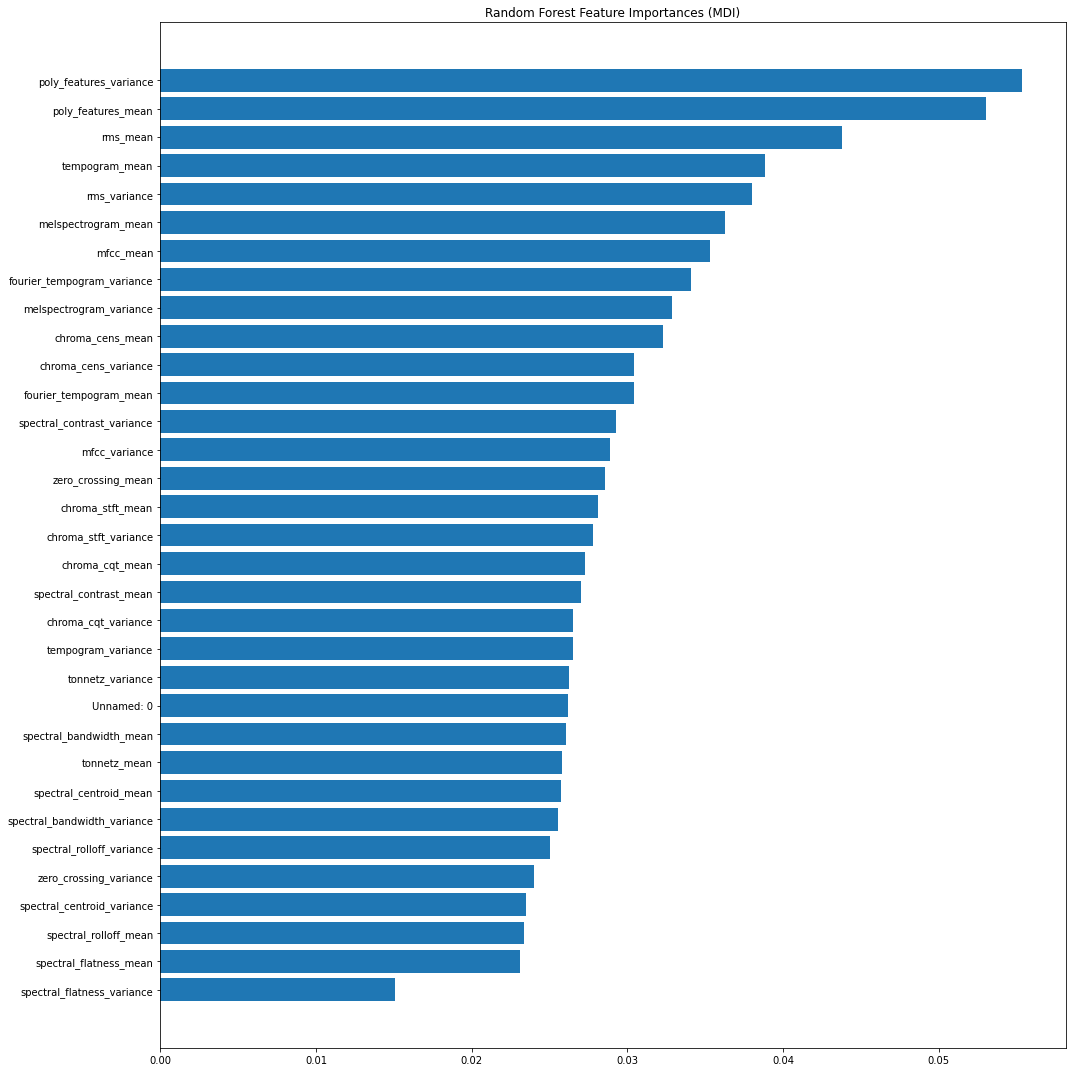

In [51]:
tree_feature_importances = pipe_baseline.named_steps["classifier"].feature_importances_
sorted_idx = tree_feature_importances.argsort()

feature_names = X.columns

y_ticks = np.arange(0, len(feature_names))
fig, ax = plt.subplots(figsize=(15,15))
ax.barh(y_ticks, tree_feature_importances[sorted_idx])
ax.set_yticks(y_ticks)
ax.set_yticklabels(feature_names[sorted_idx])
ax.set_title("Random Forest Feature Importances (MDI)")
fig.tight_layout()
plt.show()

## Gender baseline

Dummy score to beat will be 0.5

In [ ]:
le.fit(targets['gender'])
y = le.transform(targets['gender'])

In [ ]:
cv_results = cross_validate(pipe_baseline,X,y,cv=5,scoring='accuracy')
score_baseline = cv_results['test_score'].mean()
score_baseline

Score is ~84%

Ok looks like we can determine the gender quite well on a small sample

## Gender/emotion combo

In [ ]:
le.fit(targets['gender_emotion'])
y = le.transform(targets['gender_emotion'])

In [ ]:
cv_results = cross_validate(pipe_baseline,X,y,cv=5,scoring='accuracy')
score_baseline = cv_results['test_score'].mean()
score_baseline

Score is ~0.37

Looks like we loose a bit of accuracy when combining gender and emotion as a target 

In [ ]:
## sad

le.fit(targets['sad'])
y = le.transform(targets['sad'])

cv_results = cross_validate(pipe_baseline,X,y,cv=5,scoring='precision')
score_baseline = cv_results['test_score'].mean()
score_baseline

In [ ]:
## angry

le.fit(targets['angry'])
y = le.transform(targets['angry'])

cv_results = cross_validate(pipe_baseline,X,y,cv=5,scoring='precision')
score_baseline = cv_results['test_score'].mean()
score_baseline

In [ ]:
## disgust

le.fit(targets['disgust'])
y = le.transform(targets['disgust'])

cv_results = cross_validate(pipe_baseline,X,y,cv=5,scoring='precision')
score_baseline = cv_results['test_score'].mean()
score_baseline

In [ ]:
## fear

le.fit(targets['fear'])
y = le.transform(targets['fear'])

cv_results = cross_validate(pipe_baseline,X,y,cv=5,scoring='precision')
score_baseline = cv_results['test_score'].mean()
score_baseline

In [ ]:
## happy

le.fit(targets['happy'])
y = le.transform(targets['happy'])

cv_results = cross_validate(pipe_baseline,X,y,cv=5,scoring='precision')
score_baseline = cv_results['test_score'].mean()
score_baseline

In [ ]:
## neutral

le.fit(targets['neutral'])
y = le.transform(targets['neutral'])

cv_results = cross_validate(pipe_baseline,X,y,cv=5,scoring='precision')
score_baseline = cv_results['test_score'].mean()
score_baseline

# Grid searching

In [ ]:
pipe_xgb = make_pipeline(preproc_pipe, XGBClassifier(eval_metric='mlogloss',use_label_encoder=False))

In [ ]:
le.fit(targets['emotion'])
y = le.transform(targets['emotion'])

cv_results = cross_validate(pipe_xgb,X,y,cv=5,scoring='accuracy')
score_xgb = cv_results['test_score'].mean()
score_xgb

In [ ]:
from scipy import stats

In [ ]:
pipe_xgb.get_params()

In [ ]:
grid = {
        'xgbclassifier__n_estimators': stats.randint(50,150),
        'xgbclassifier__max_depth': stats.randint(0,50),
        'xgbclassifier__learning_rate': stats.uniform(0,0.5),
        'xgbclassifier__gamma': stats.uniform(0,10),
        'xgbclassifier__reg_alpha': stats.uniform(0,20),
        'xgbclassifier__min_child_weight': stats.uniform(0,5),
        'xgbclassifier__subsample': stats.uniform(0,1),
        'xgbclassifier__colsample_bytree': stats.uniform(0,1),        
}

search = RandomizedSearchCV(pipe_xgb, grid, 
                            scoring='accuracy',
                            n_iter=50,  
                            cv=5,
                           random_state=0)

search.fit(X_2, y)

In [ ]:
search.best_params_

In [ ]:
search.best_score_

In [ ]:
search.best_estimator_